# <div style="color:white; font-size:30px; text-align:center; background:#023265; padding:10px; margin:5px; border-radius:10px;">MNIST DIGIT CLASSIFIER</div>

## <div style="color:white; font-size:25px; text-align:center; background:#0151A7; padding:10px; margin:5px; border-radius:10px;">Improting Libraries</div>

In [ ]:
import random
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.utils import to_categorical 
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense

warnings.filterwarnings('ignore')

## <div style="color:white; font-size:25px; text-align:center; background:#0151A7; padding:10px; margin:5px; border-radius:10px;">Loading Dataset</div>

In [51]:
train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

In [52]:
# taking a look at data
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## <div style="color:white; font-size:25px; text-align:center; background:#0151A7; padding:10px; margin:5px; border-radius:10px;">Sample Images</div>

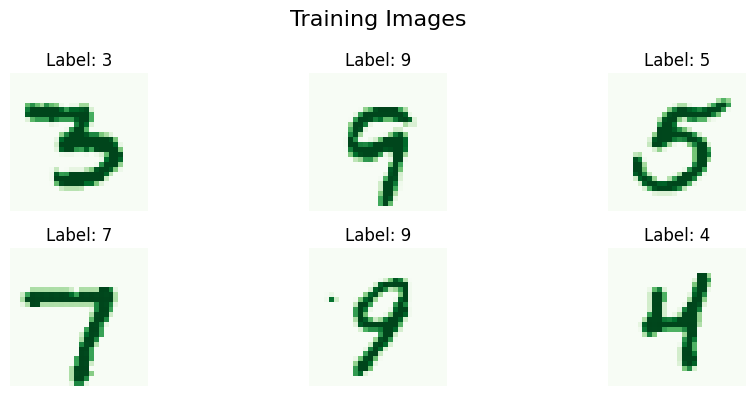

In [53]:
fig, axes = plt.subplots(2, 3, figsize=(10, 4))
axes = axes.flatten()

for i in range(6):
    random_image = random.randint(0,train.shape[0]) 
    image = train.iloc[random_image, 1:].values
    label = train.iloc[random_image, 0]
    
    image_data = image.reshape(28, 28)
    
    axes[i-1].imshow(image_data, cmap='Greens')
    axes[i-1].set_title(f'Label: {label}')
    axes[i-1].axis('off') 

plt.suptitle("Training Images", size=16)
plt.tight_layout()
plt.show()

## <div style="color:white; font-size:25px; text-align:center; background:#0151A7; padding:10px; margin:5px; border-radius:10px;">Dataset Exploration</div>

In [54]:
# Training Information
print("--"*20)
print("**Training Data**")
print(f"Total Rows: {train.shape[0]}")
print(f"Total Features: {len(train.columns)}")
print(f"Inforamtion-")
print(train.info())
print("--"*20)

----------------------------------------
**Training Data**
Total Rows: 42000
Total Features: 785
Inforamtion-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None
----------------------------------------


In [55]:
# Testing Information
print("--"*20)
print("**Testing Data**")
print(f"Total Rows: {test.shape[0]}")
print(f"Total Features: {len(test.columns)}")
print(f"Inforamtion-")
print(test.info())
print("--"*20)

----------------------------------------
**Testing Data**
Total Rows: 28000
Total Features: 784
Inforamtion-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB
None
----------------------------------------


In [56]:
# Null data
print(f"Null Values in Training Dataset - {train.isnull().sum().sum()}")
print(f"Null Values in Testing Dataset - {test.isnull().sum().sum()}")

Null Values in Training Dataset - 0
Null Values in Testing Dataset - 0


In [57]:
# Duplicate data
print(f"Duplicate Values in Training Dataset - {train.duplicated().sum()}")
print(f"Duplicate Values in Testing Dataset - {test.duplicated().sum()}")

Duplicate Values in Training Dataset - 0
Duplicate Values in Testing Dataset - 0


## <div style="color:white; font-size:25px; text-align:center; background:#0151A7; padding:10px; margin:5px; border-radius:10px;">Dependent Feature</div>

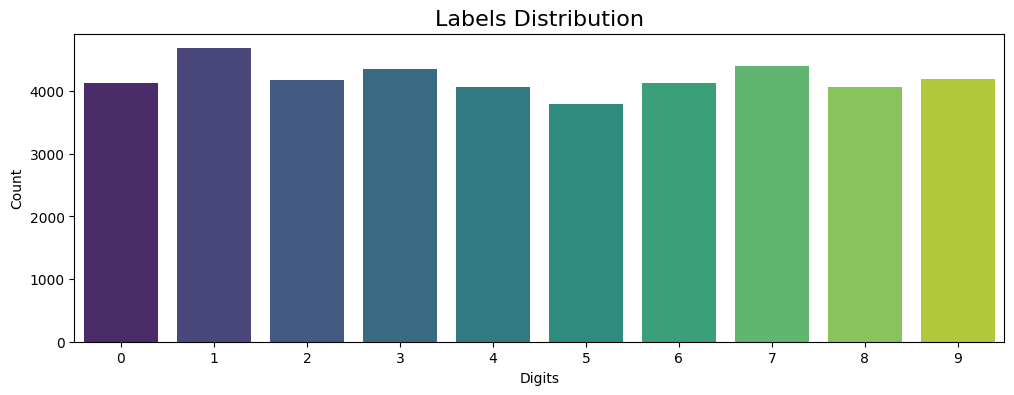

In [58]:
# plotting digits distribution
plt.figure(figsize=(12,4))
sns.countplot(train, x='label', palette='viridis')
plt.title("Labels Distribution", size=16)
plt.xlabel("Digits")
plt.ylabel("Count")
plt.show()

## <div style="color:white; font-size:25px; text-align:center; background:#0151A7; padding:10px; margin:5px; border-radius:10px;">Data Preprocessing</div>

In [84]:
# Splitting data into dependent and indendent features
X = train.drop(columns='label')
y = train['label']

# Reshaping Data
X_train = np.reshape(X, (-1, 28, 28, 1))

# Normalizing Data
X_train = X_train.astype("float32")/255.

# Performing One Hot Encoding
y_train = to_categorical(y)

## <div style="color:white; font-size:25px; text-align:center; background:#0151A7; padding:10px; margin:5px; border-radius:10px;">Model Training</div>

In [95]:
# Define the model
model = Sequential([
    # First Convolutional Block
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
    Dropout(0.25),
    
    # Second Convolutional Block
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
    Dropout(0.25),
        
    # Fully Connected Layers
    Flatten(),
    Dense(512, activation='relu'), 
    Dropout(0.25),
    Dense(256, activation='relu'),
    Dropout(0.5),

    # Output Layer
    Dense(10, activation='softmax')
])


# Data Augmentation
datagen = ImageDataGenerator(
    zoom_range=0.1,
    height_shift_range=0.1,
    width_shift_range=0.1,
    rotation_range=10
)


# Compiling the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


# Training the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=30,
    verbose=2,
)

Epoch 1/30
1313/1313 - 35s - 27ms/step - accuracy: 0.8824 - loss: 0.3947
Epoch 2/30
1313/1313 - 17s - 13ms/step - accuracy: 0.9634 - loss: 0.1425
Epoch 3/30
1313/1313 - 17s - 13ms/step - accuracy: 0.9712 - loss: 0.1208
Epoch 4/30
1313/1313 - 17s - 13ms/step - accuracy: 0.9760 - loss: 0.1022
Epoch 5/30
1313/1313 - 17s - 13ms/step - accuracy: 0.9762 - loss: 0.0990
Epoch 6/30
1313/1313 - 20s - 16ms/step - accuracy: 0.9787 - loss: 0.0924
Epoch 7/30
1313/1313 - 17s - 13ms/step - accuracy: 0.9811 - loss: 0.0831
Epoch 8/30
1313/1313 - 17s - 13ms/step - accuracy: 0.9808 - loss: 0.0892
Epoch 9/30
1313/1313 - 17s - 13ms/step - accuracy: 0.9832 - loss: 0.0753
Epoch 10/30
1313/1313 - 17s - 13ms/step - accuracy: 0.9835 - loss: 0.0721
Epoch 11/30
1313/1313 - 17s - 13ms/step - accuracy: 0.9843 - loss: 0.0698
Epoch 12/30
1313/1313 - 17s - 13ms/step - accuracy: 0.9842 - loss: 0.0684
Epoch 13/30
1313/1313 - 16s - 13ms/step - accuracy: 0.9852 - loss: 0.0691
Epoch 14/30
1313/1313 - 17s - 13ms/step - accur

## <div style="color:white; font-size:25px; text-align:center; background:#0151A7; padding:10px; margin:5px; border-radius:10px;">Model Evaluation</div>

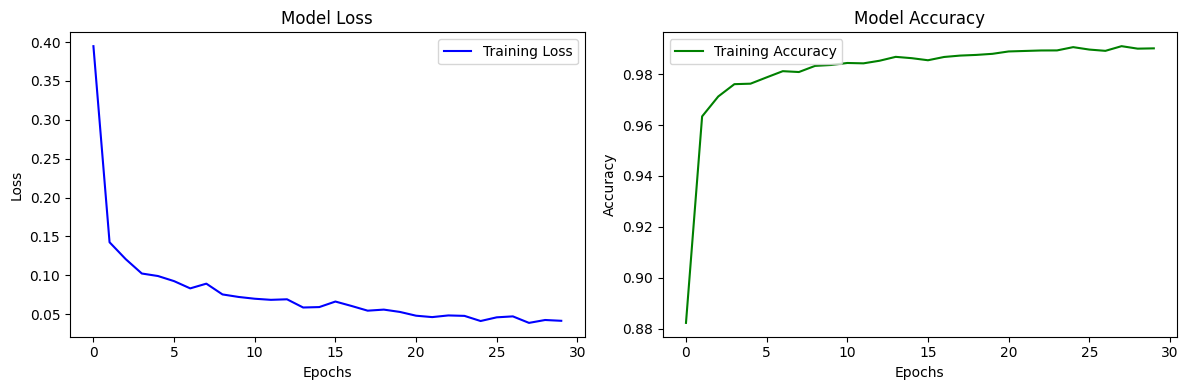

In [96]:
# Plotting Accuracy & Loss Curve
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot Loss
axs[0].plot(history.history['loss'], color='b', label='Training Loss')
axs[0].set_title('Model Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(loc='upper right')

# Plot Accuracy
axs[1].plot(history.history['accuracy'], color='g', label='Training Accuracy')
axs[1].set_title('Model Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(loc='upper left')

# Display the plots
plt.tight_layout()
plt.show()

## <div style="color:white; font-size:25px; text-align:center; background:#0151A7; padding:10px; margin:5px; border-radius:10px;">Testing Prediction & Model Submission</div>

In [97]:
# Loading Testing Data 
test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

# Reshaping Data
test = np.reshape(test, (-1, 28, 28, 1))

# Normalizing Data
test = test.astype("float32")/255.

In [98]:
# Making prediction
prediction = model.predict(test)

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [99]:
# Submission data 
result = np.argmax(prediction,axis = 1)
result = pd.Series(result,name="Label")

submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),result],axis = 1)
submission.to_csv("submission.csv",index=False)